## 1. Loading and Cleaning Data

In [1]:
import os
import json
import pandas as pd

def load_json_data(folder_path):
    # List to store data from all JSON files
    all_data = []
    
    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            
            with open(file_path, 'r') as f:
                # Load each JSON file
                data = json.load(f)
                
                # If necessary, flatten or adjust the structure of data here
                all_data.append(data)
    
    # Convert the list of data to a DataFrame
    df = pd.json_normalize(all_data)
    
    return df

# Define the paths to the folders
path_production = r'D:\Career\Enterprise workflow\ai-workflow-capstone-master\ai-workflow-capstone-master\cs-production'
path_train = r'D:\Career\Enterprise workflow\ai-workflow-capstone-master\ai-workflow-capstone-master\cs-train'

# Load data from both folders
df_production = load_json_data(path_production)
df_train = load_json_data(path_train)

# Combine the data into one DataFrame
df_combined = pd.concat([df_production, df_train], ignore_index=True)

# Display the first few rows of the combined DataFrame
df_combined.head()


,0,1,2,3,4,5,6,7,8,9,...,86128,86129,86130,86131,86132,86133,86134,86135,86136,86137
0,"{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Handling Missing Values and Feature Engineering

In [2]:
# Check for missing values
missing_values = df_combined.isnull().sum()

# Inspect column names and data types
columns_info = df_combined.info()

# Display the results
missing_values, columns_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Columns: 86138 entries, 0 to 86137
dtypes: object(86138)
memory usage: 17.1+ MB


(0         0
 1         0
 2         0
 3         0
 4         0
          ..
 86133    25
 86134    25
 86135    25
 86136    25
 86137    25
 Length: 86138, dtype: int64,
 None)

In [3]:
# Remove duplicate columns if any
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

# Display the first few rows to understand the structure
df_combined.head()


,0,1,2,3,4,5,6,7,8,9,...,86128,86129,86130,86131,86132,86133,86134,86135,86136,86137
0,"{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...","{'country': 'United Kingdom', 'customer_id': N...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...","{'country': 'United Kingdom', 'customer_id': 1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Iterate over each row and normalize the data in the first column
flattened_data = []

for index, row in df_combined.iterrows():
    # Flatten the dictionary in the first column of each row
    if isinstance(row[0], dict):  # Ensure it's a dictionary-like structure
        flattened_data.append(pd.json_normalize(row[0]))
    else:
        flattened_data.append(None)

# Convert the list of flattened data into a DataFrame
df_combined_cleaned = pd.concat(flattened_data, ignore_index=True)

# Drop columns that are completely NaN
df_combined_cleaned.dropna(axis=1, how='all', inplace=True)

# Display the first few rows to inspect the cleaned data
df_combined_cleaned.head()


C:\Users\IpsitMohanty\AppData\Local\Temp\ipykernel_26548\2882772951.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined_cleaned = pd.concat(flattened_data, ignore_index=True)


,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,total_price,StreamID,TimesViewed
0,United Kingdom,NaN,562417,8.29,40016,1.0,2019,08,01,NaN,NaN,NaN
1,United Kingdom,14852.0,565439,4.95,21485,3.0,2019,09,01,NaN,NaN,NaN
2,United Kingdom,14506.0,569524,1.25,21894,1.0,2019,10,01,NaN,NaN,NaN
3,United Kingdom,15707.0,574536,0.83,23354,2.0,2019,11,01,NaN,NaN,NaN
4,United Kingdom,14456.0,580513,NaN,20978,2.0,2019,12,01,1.25,NaN,NaN


In [5]:
# Check the current columns in the DataFrame
df_combined_cleaned.columns


Index(['country', 'customer_id', 'invoice', 'price', 'stream_id',
       'times_viewed', 'year', 'month', 'day', 'total_price', 'StreamID',
       'TimesViewed'],
      dtype='object')

In [6]:
# Identify numeric and non-numeric columns
numeric_columns = df_combined_cleaned.select_dtypes(include=['number']).columns
non_numeric_columns = df_combined_cleaned.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with the mean
df_combined_cleaned[numeric_columns] = df_combined_cleaned[numeric_columns].fillna(df_combined_cleaned[numeric_columns].mean())

# Fill missing values for non-numeric columns with 'Unknown'
df_combined_cleaned[non_numeric_columns] = df_combined_cleaned[non_numeric_columns].fillna('Unknown')

# Display the first few rows to check
df_combined_cleaned.head()


,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,total_price,StreamID,TimesViewed
0,United Kingdom,15236.95,562417,8.29000,40016,1.0,2019,08,01,1.932,Unknown,4.416667
1,United Kingdom,14852.00,565439,4.95000,21485,3.0,2019,09,01,1.932,Unknown,4.416667
2,United Kingdom,14506.00,569524,1.25000,21894,1.0,2019,10,01,1.932,Unknown,4.416667
3,United Kingdom,15707.00,574536,0.83000,23354,2.0,2019,11,01,1.932,Unknown,4.416667
4,United Kingdom,14456.00,580513,2.76381,20978,2.0,2019,12,01,1.250,Unknown,4.416667


In [7]:
print(df_combined_cleaned.columns)


Index(['country', 'customer_id', 'invoice', 'price', 'stream_id',
       'times_viewed', 'year', 'month', 'day', 'total_price', 'StreamID',
       'TimesViewed'],
      dtype='object')


## 3. Data Transformation


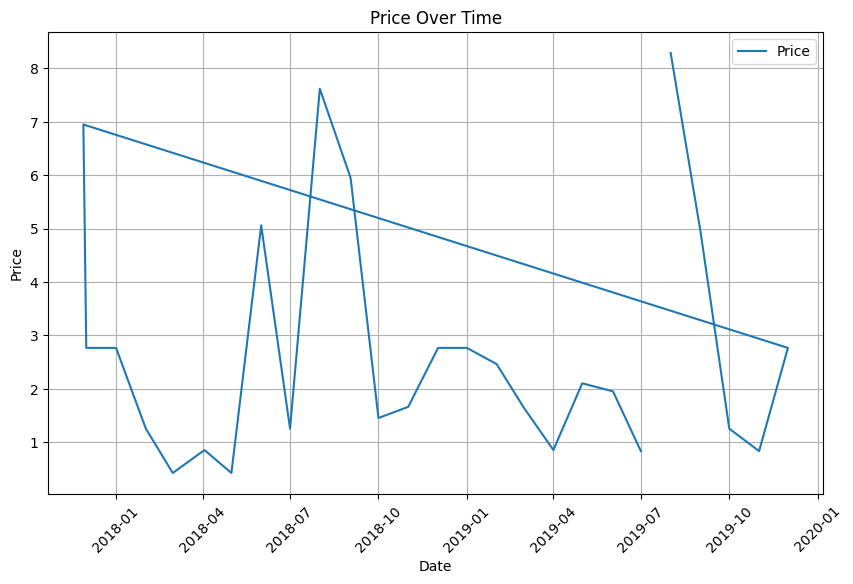

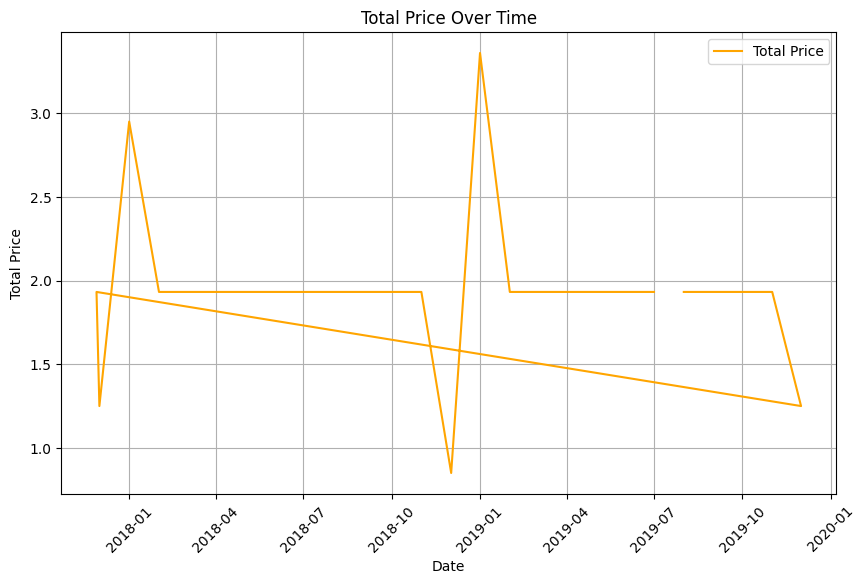

In [8]:
# Combine year, month, and day into a single 'date' column
df_combined_cleaned['date'] = pd.to_datetime(df_combined_cleaned[['year', 'month', 'day']])

# Now, let's plot the price and total price over time
import matplotlib.pyplot as plt

# Plot price over time (for basic trend analysis)
plt.figure(figsize=(10, 6))
plt.plot(df_combined_cleaned['date'], df_combined_cleaned['price'], label='Price')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot total_price over time
plt.figure(figsize=(10, 6))
plt.plot(df_combined_cleaned['date'], df_combined_cleaned['total_price'], label='Total Price', color='orange')
plt.title('Total Price Over Time')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


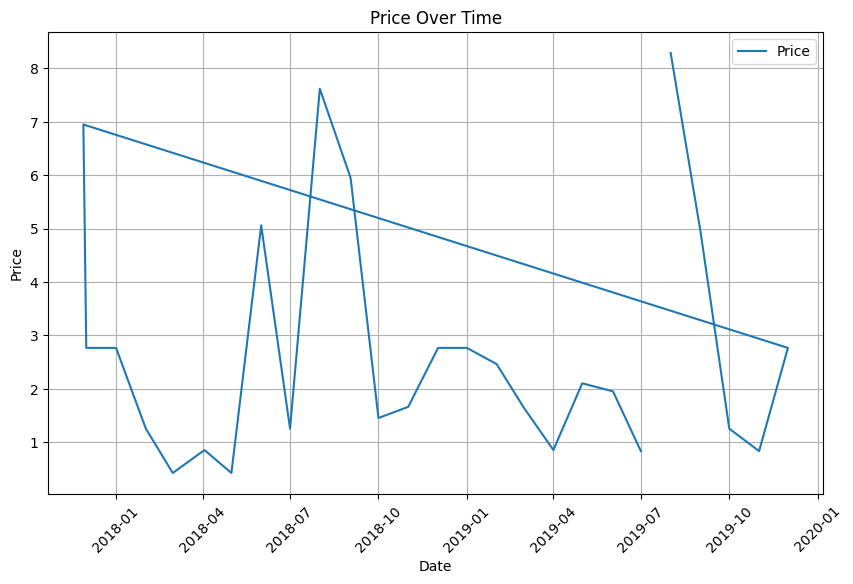

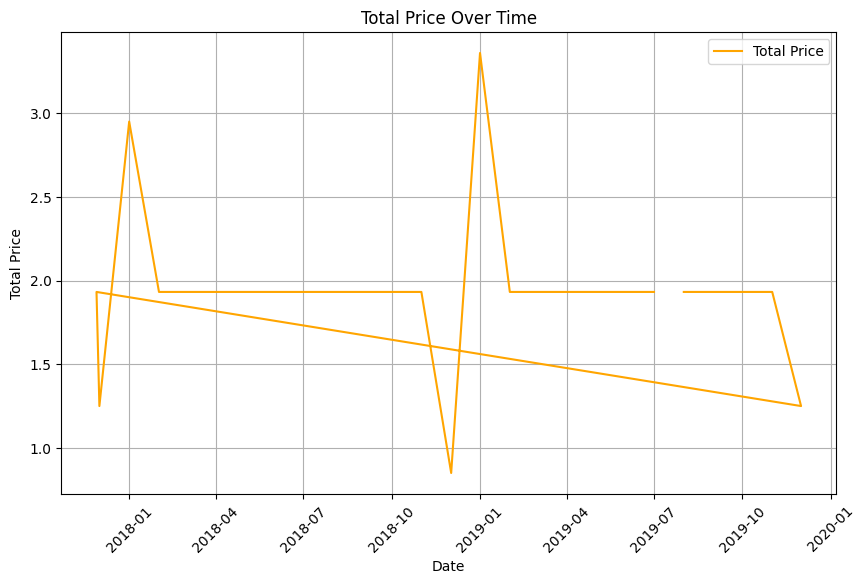

In [9]:
# Ensure the 'date' column is in datetime format
df_combined_cleaned['date'] = pd.to_datetime(df_combined_cleaned['date'])

# Plot price over time (for basic trend analysis)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_combined_cleaned['date'], df_combined_cleaned['price'], label='Price')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot total_price over time
plt.figure(figsize=(10, 6))
plt.plot(df_combined_cleaned['date'], df_combined_cleaned['total_price'], label='Total Price', color='orange')
plt.title('Total Price Over Time')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


## 4. Data Preparation for Modeling


In [10]:
from sklearn.model_selection import train_test_split

# Sort by date to ensure time-series order
df_combined_cleaned = df_combined_cleaned.sort_values('date')

# Create lag feature (previous price values)
df_combined_cleaned['price_lag'] = df_combined_cleaned['price'].shift(1)

# Drop rows with NaN values (created by lag)
df_combined_cleaned = df_combined_cleaned.dropna(subset=['price_lag'])

# Define the feature matrix (X) and target variable (y)
X = df_combined_cleaned[['price_lag']]  # Using the previous price to predict the current price
y = df_combined_cleaned['price']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Display the split data
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (17, 1)
Test set size: (8, 1)


## 5. Linear Regression Model

Mean Squared Error (MSE): 5.918399523332491
R-squared (R²): -0.0270324346548525


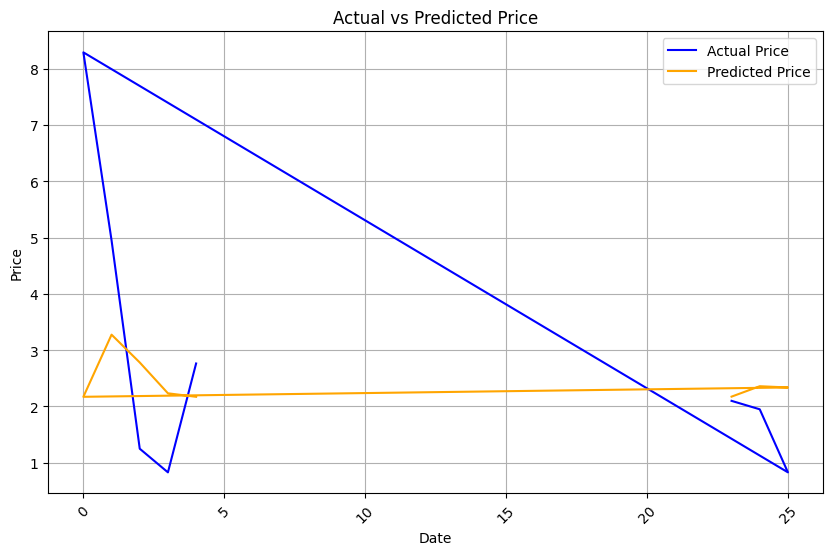

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Plot the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='orange')
plt.title('Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## 6. ARIMA Model for Time-Series Forecasting

Mean Squared Error (MSE) for ARIMA: 5.721393160278861


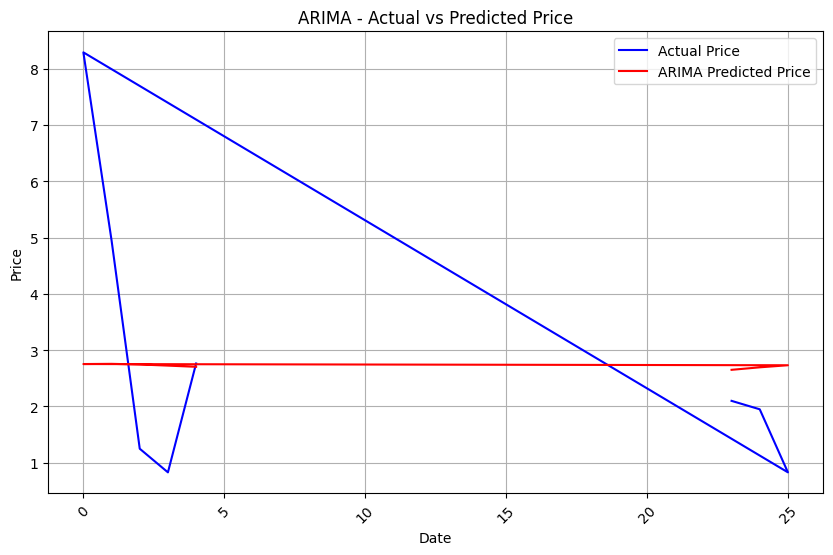

In [12]:
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Define the ARIMA model with the best order (use the best order from your previous step)
best_order = (2, 0, 2)  # This is an example, adjust based on your findings
model = ARIMA(df_combined_cleaned['price'], order=best_order)

# Fit the ARIMA model
model_fit = model.fit()

# Ensure proper indices for the prediction (if needed)
# Use the last known value for predictions
y_pred_arima = model_fit.forecast(steps=len(X_test))

# Step 5: Evaluate the model using Mean Squared Error (MSE)
mse_arima = mean_squared_error(y_test, y_pred_arima)
print(f"Mean Squared Error (MSE) for ARIMA: {mse_arima}")

# Step 6: Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_arima, label='ARIMA Predicted Price', color='red')
plt.title('ARIMA - Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import aic

# Suppress warnings for better output clarity
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize variables for best model selection
best_aic = float('inf')
best_order = None
best_model = None

# Define the parameters to try
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Iterate over all combinations of p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(df_combined_cleaned['price'], order=(p, d, q))
                model_fit = model.fit()
                
                # Calculate AIC for the model
                model_aic = model_fit.aic
                if model_aic < best_aic:
                    best_aic = model_aic
                    best_order = (p, d, q)
                    best_model = model_fit
                print(f"ARIMA({p},{d},{q}) - AIC: {model_aic}")
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) failed: {e}")

# Output the best parameters and corresponding AIC
print(f"Best ARIMA model: {best_order} with AIC: {best_aic}")


ARIMA(0,0,0) - AIC: 112.36389834881135
ARIMA(0,0,1) - AIC: 113.78229425507658
ARIMA(0,0,2) - AIC: 115.47029944340863
ARIMA(0,1,0) - AIC: 120.12979150492886
ARIMA(0,1,1) - AIC: 112.22795700491773
ARIMA(0,1,2) - AIC: 113.34373148858
ARIMA(1,0,0) - AIC: 113.9150084936248
ARIMA(1,0,1) - AIC: 115.6466732158226
ARIMA(1,0,2) - AIC: 113.65191852841578
ARIMA(1,1,0) - AIC: 119.07295553287145
ARIMA(1,1,1) - AIC: 113.47998063320155
ARIMA(1,1,2) - AIC: 115.29047242293785
ARIMA(2,0,0) - AIC: 115.41996852477483
ARIMA(2,0,1) - AIC: 112.85177955715388
ARIMA(2,0,2) - AIC: 109.9405127539307
ARIMA(2,1,0) - AIC: 118.83739149737039
ARIMA(2,1,1) - AIC: 115.21985269096655
ARIMA(2,1,2) - AIC: 117.48049550247723
Best ARIMA model: (2, 0, 2) with AIC: 109.9405127539307


## 7. Final ARIMA Model Evaluation

Final Mean Squared Error (MSE) for ARIMA(2, 0, 2): 5.721393160278861


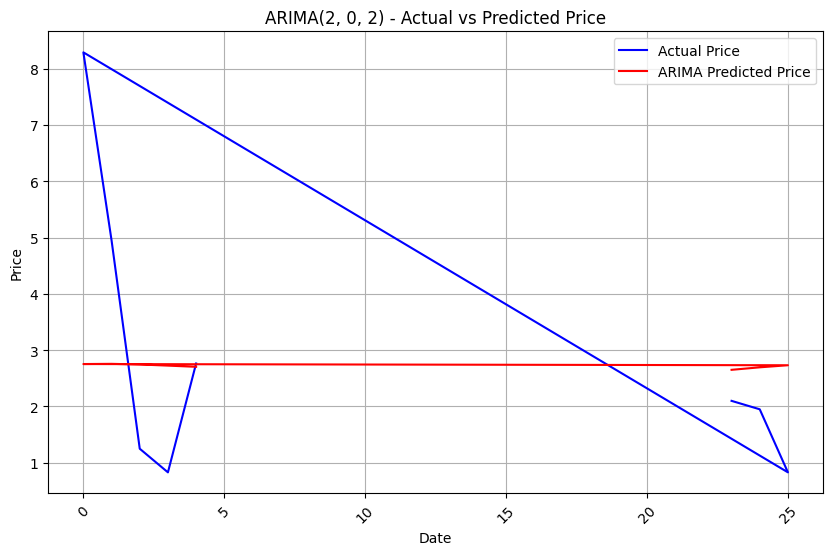

In [14]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Reset the index to default integer index
df_combined_cleaned.reset_index(drop=True, inplace=True)

# Fit the ARIMA(2, 0, 2) model on the full data
best_model = ARIMA(df_combined_cleaned['price'], order=(2, 0, 2))
model_fit = best_model.fit()

# Make predictions on the test set by forecasting the next len(X_test) steps
y_pred_arima_final = model_fit.forecast(steps=len(X_test))

# Step 5: Evaluate the model using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse_arima_final = mean_squared_error(y_test, y_pred_arima_final)
print(f"Final Mean Squared Error (MSE) for ARIMA(2, 0, 2): {mse_arima_final}")

# Step 6: Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred_arima_final, label='ARIMA Predicted Price', color='red')
plt.title('ARIMA(2, 0, 2) - Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## 8. Saving the Model and Sending Predictions

In [19]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\IpsitMohanty


In [20]:
with open(r'D:\Career\Enterprise workflow\ai-workflow-capstone-master\ai-workflow-capstone-master\arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)
print("Model has been saved as arima_model.pkl")


Model has been saved as arima_model.pkl


In [22]:
!pip install requests


In [23]:
import requests

# Define the URL of your Flask app's prediction endpoint
url = 'http://127.0.0.1:5000/predict'

# Example input data for the API
input_data = {
    'price': [100, 105, 110, 115, 120]  # Example price data for prediction
}

# Send a POST request to the API with the input data
response = requests.post(url, json=input_data)

# Check if the response status is OK (200)
if response.status_code == 200:
    print("Prediction Response:", response.json())
else:
    print("Error: Could not get a prediction. Status Code:", response.status_code)


Prediction Response: {'prediction': [2.651271227774531, 2.695595540183368, 2.7325770605398194, 2.753956340021768, 2.757444253814722]}
